<a href="https://colab.research.google.com/github/shriram-stack/Cancer_Detection/blob/main/Cancer_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries
In the first code cell, import the necessary Python libraries for data manipulation, machine learning, and visualization.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


Load the Dataset
The Breast Cancer Wisconsin Dataset is built into scikit-learn. It contains features computed from digitized images of breast mass samples, labeled as malignant (cancerous) or benign (non-cancerous).

In [4]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = malignant, 1 = benign)

# Convert to a DataFrame for easier exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows
print("Dataset loaded. Here are the first 5 rows:")
df.head()

Dataset loaded. Here are the first 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Explore the Data
Let’s visualize the data to understand it better. For example, we can plot a correlation heatmap of the features.

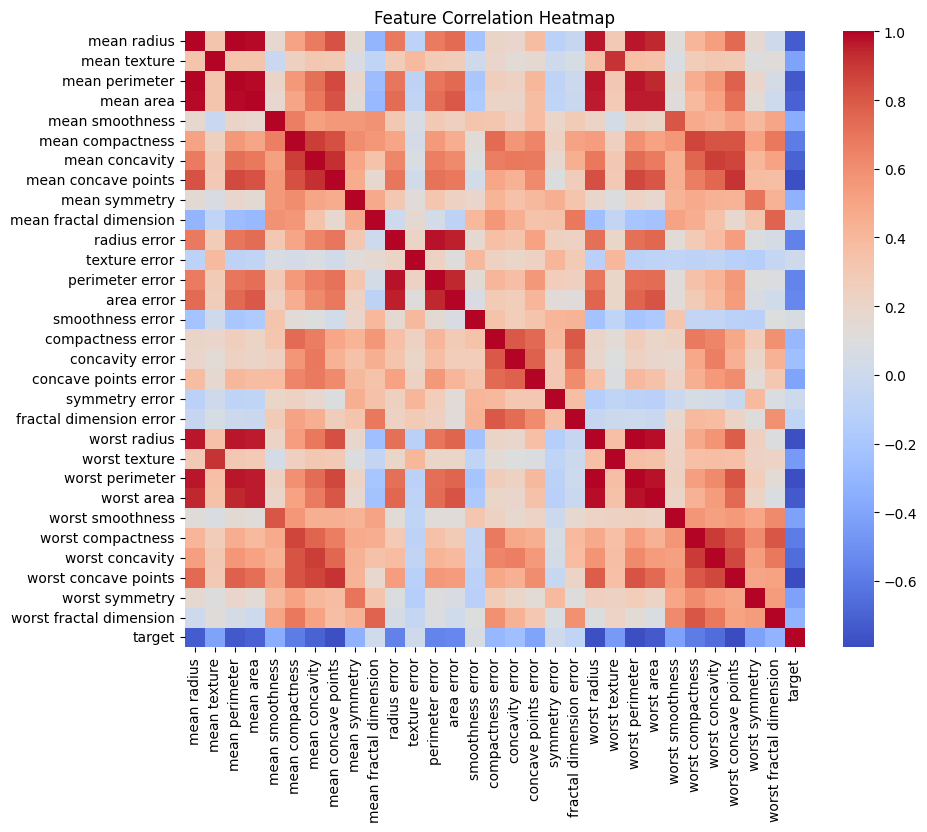

Class distribution:
target
1    357
0    212
Name: count, dtype: int64


In [5]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Check the distribution of target classes
print("Class distribution:")
print(df['target'].value_counts())  # 0 = malignant, 1 = benign

Split the Data
Split the dataset into training and testing sets to evaluate the model.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (455, 30)
Testing set size: (114, 30)


Train the Model
We’ll use Logistic Regression, a simple yet effective algorithm for binary classification.

In [7]:
# Initialize and train the model
model = LogisticRegression(max_iter=10000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


Make Predictions and Evaluate
Test the model on the test set and evaluate its performance.

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

Accuracy: 95.61%

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.91      0.94        43
      Benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Visualize Results
Let’s plot a confusion matrix to see how well the model distinguishes between classes.

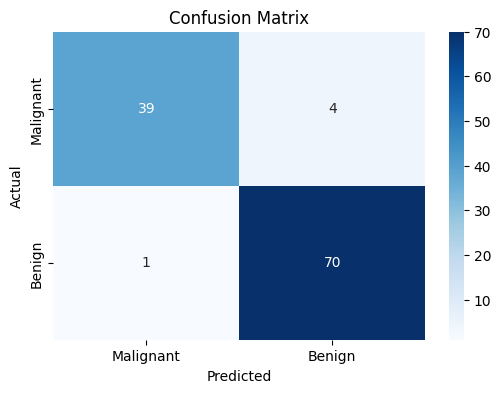

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()